##**Flight Price Prediction**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_excel("Flight_price.xlsx")

In [7]:
df

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10683 rows x 11 columns]

In [8]:
df['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [9]:
df['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [10]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [11]:
l1=['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai']
l1

['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai']

In [12]:
source=l1[0]
l2=[] 
for i in l1:
    if i==source:
       pass
    else:
     l2.append(i)
print(l2)

['Kolkata', 'Delhi', 'Chennai', 'Mumbai']


In [13]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [15]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [16]:
df.dropna(inplace = True)

In [17]:
df

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10682 rows x 11 columns]

###***EDA***


Looking at the description we can see that the *'Date_of_Journey'* is a object data type so we have to convert it into timestamp to use this column

In [18]:
df['Journey_day']= pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.day

In [19]:
df['Journey_month']= pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.month

In [20]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

   Journey_day  Journey_month  
0           24              3  
1            1              5  
2            9              6  
3           12              5  
4            1              3

In [21]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [22]:
#Similar to the Date_of_Journey we need to extract values from Departure_time as well
df['Dept_hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dept_min']=pd.to_datetime(df['Dep_Time']).dt.minute
#Now we can drop Dep_Time as we have extracted the useful values
df.drop(['Dep_Time'],axis = 1,inplace=True)

In [23]:
#Similar to the Date_of_Journey we need to extract values from Arrival_time as well
df['Arrival_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute
#Now we can drop Dep_Time as we have extracted the useful values
df.drop(['Arrival_Time'],axis = 1,inplace=True)

In [24]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df['Duration(in min)'] = (df['Duration'].dt.total_seconds() / 60).astype(int)
df.drop('Duration', axis = 1, inplace = True)


In [25]:
for i,data in df.iterrows():
  if data['Total_Stops']=='1 stop':
    df.at[i,'Total_Stops']=1
  if data['Total_Stops']=='non-stop':
    df.at[i,'Total_Stops']=0
  if data['Total_Stops']=='2 stops':
    df.at[i,'Total_Stops']=2
  if data['Total_Stops']=='3 stops':
    df.at[i,'Total_Stops']=3
  if data['Total_Stops']=='4 stops':
    df.at[i,'Total_Stops']=4


In [26]:
df.head()

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL           0   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR           2   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK           2   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR           1   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL           1   

  Additional_Info  Price  Journey_day  Journey_month  Dept_hr  Dept_min  \
0         No info   3897           24              3       22        20   
1         No info   7662            1              5        5        50   
2         No info  13882            9              6        9        25   
3         No info   6218           12              5       18         5   
4         No info  13302            1              3       16        50   

   Arrival_hr  Arrival_min  Duration(in min)  
0           1           10               170  
1          13           15               445  
2           4           25              1140  
3          23           30               325  
4          21           35               285

In [27]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

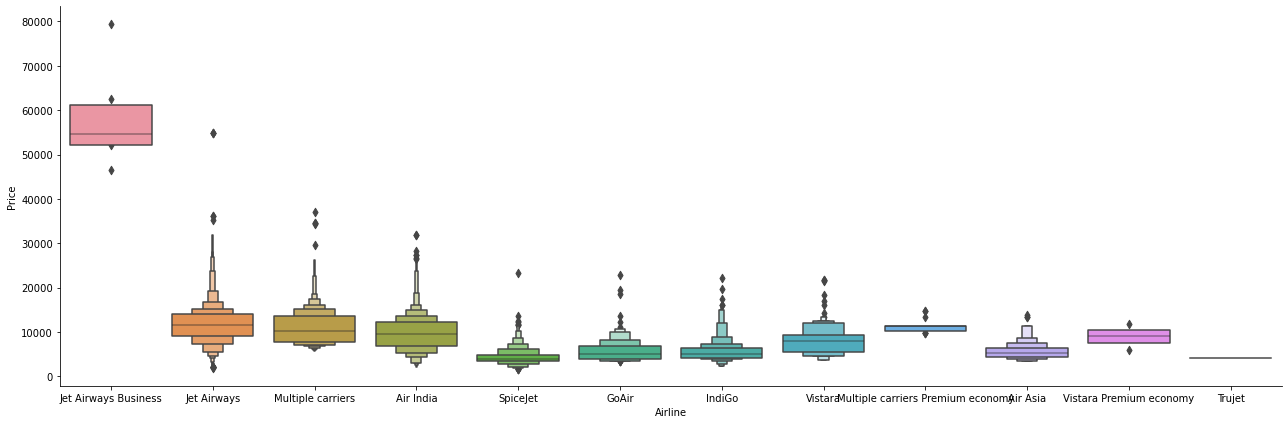

In [28]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect=3 )
plt.show()

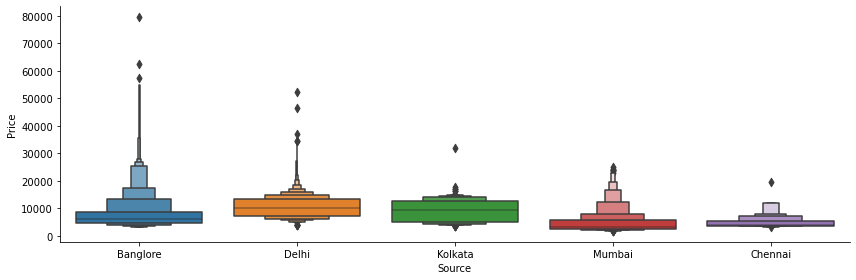

In [29]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [31]:
#One hot encoding on Source, Airline and Destination
import pandas as pd
df_new = pd.get_dummies(df,columns=['Destination','Source','Airline'])    
df_new.head()


Route Total_Stops Additional_Info  Price  Journey_day  \
0              BLR → DEL           0         No info   3897           24   
1  CCU → IXR → BBI → BLR           2         No info   7662            1   
2  DEL → LKO → BOM → COK           2         No info  13882            9   
3        CCU → NAG → BLR           1         No info   6218           12   
4        BLR → NAG → DEL           1         No info  13302            1   

   Journey_month  Dept_hr  Dept_min  Arrival_hr  Arrival_min  ...  \
0              3       22        20           1           10  ...   
1              5        5        50          13           15  ...   
2              6        9        25           4           25  ...   
3              5       18         5          23           30  ...   
4              3       16        50          21           35  ...   

   Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0              0               1                    0   
1              0               0                    0   
2              0               0                    1   
3              0               1                    0   
4              0               1                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                          0                 0   
2                                          0                 0   
3                                          0                 0   
4                                          0                 0   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  
0               0                0                                0  
1               0                0                                0  
2               0                0                                0  
3               0                0                                0  
4               0                0                                0  

[5 rows x 34 columns]

In [26]:
# As as the info from the Route can derived from the total no of stops therefore we can drop the Route columns
df_new.drop(['Route','Additional_Info'],axis=1,inplace= True)

###**Feature Selection**

Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

In [27]:
df_new.shape

(10682, 32)

In [28]:
df_new.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dept_hr',
       'Dept_min', 'Arrival_hr', 'Arrival_min', 'Duration(in min)',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy'],
      dtype='object')

In [29]:
X = df_new.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dept_hr',
       'Dept_min', 'Arrival_hr', 'Arrival_min', 'Duration(in min)',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy']]
X.head()

Total_Stops  Journey_day  Journey_month  Dept_hr  Dept_min  Arrival_hr  \
0           0           24              3       22        20           1   
1           2            1              5        5        50          13   
2           2            9              6        9        25           4   
3           1           12              5       18         5          23   
4           1            1              3       16        50          21   

   Arrival_min  Duration(in min)  Destination_Banglore  Destination_Cochin  \
0           10               170                     0                   0   
1           15               445                     1                   0   
2           25              1140                     0                   1   
3           30               325                     1                   0   
4           35               285                     0                   0   

   ...  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0  ...              0               1                    0   
1  ...              0               0                    0   
2  ...              0               0                    1   
3  ...              0               1                    0   
4  ...              0               1                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                          0                 0   
2                                          0                 0   
3                                          0                 0   
4                                          0                 0   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  
0               0                0                                0  
1               0                0                                0  
2               0                0                                0  
3               0                0                                0  
4               0                0                                0  

[5 rows x 31 columns]

In [30]:
y = df_new.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

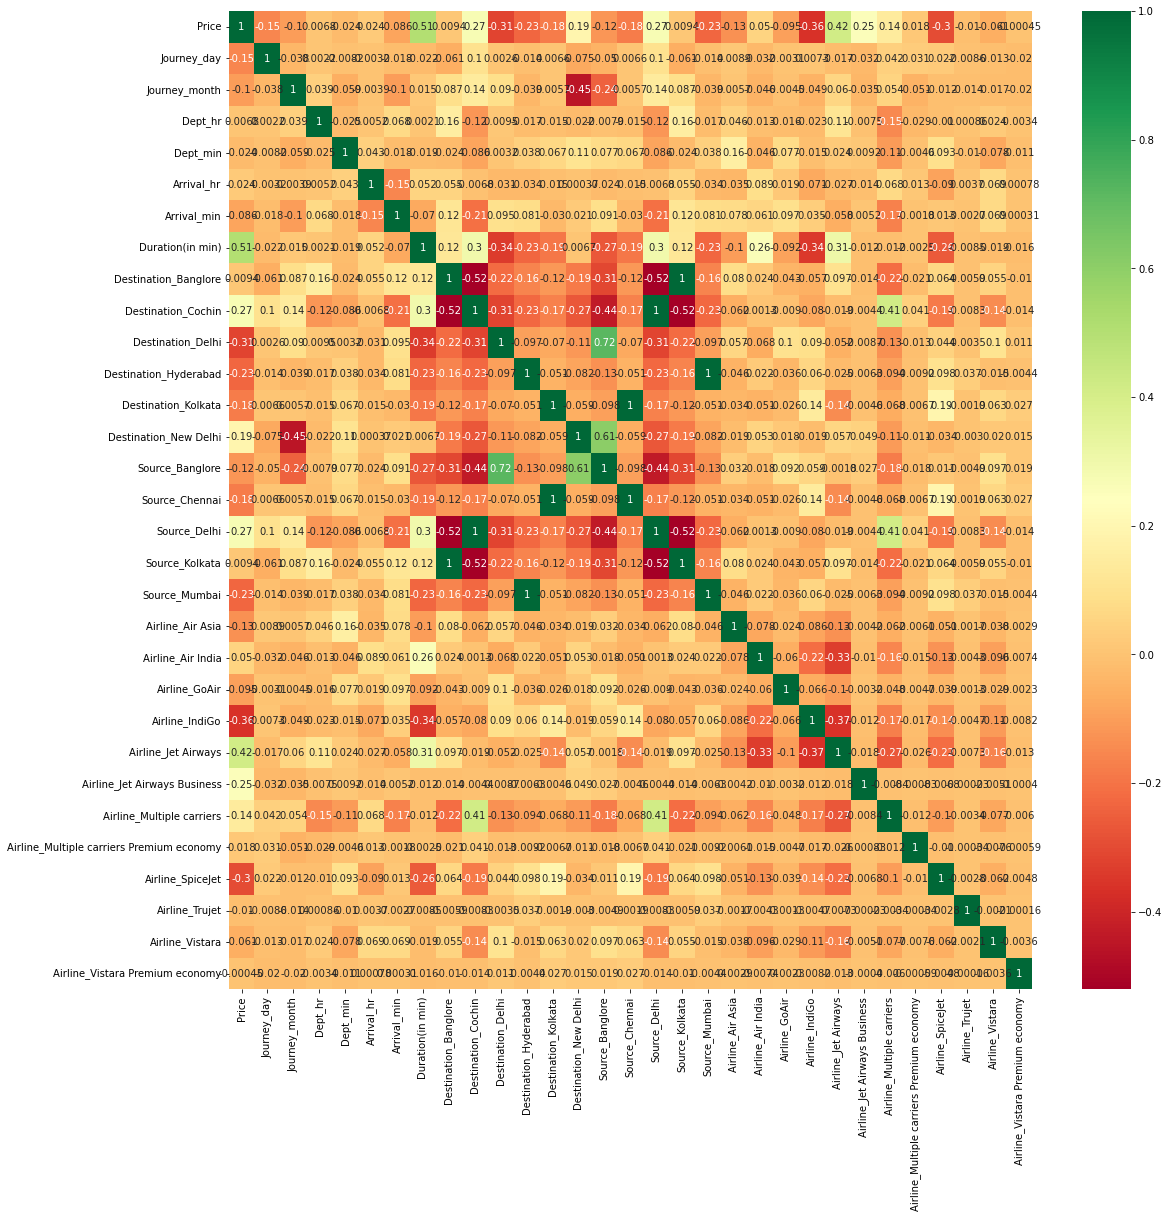

In [31]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(df_new.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [32]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [33]:
print(selection.feature_importances_)

[2.41077994e-01 1.45334580e-01 5.26808573e-02 2.62868289e-02
 2.51087250e-02 3.00396194e-02 2.18874105e-02 1.06783206e-01
 1.61337811e-03 1.37085780e-02 1.59545140e-02 6.01103850e-03
 4.51492334e-04 1.68532085e-02 8.46570917e-03 2.93496397e-04
 1.01099055e-02 1.93353753e-03 7.85908277e-03 1.68604584e-03
 1.00905542e-02 1.61001213e-03 1.56999864e-02 1.41421300e-01
 6.72750326e-02 2.09954721e-02 8.56045921e-04 2.40977408e-03
 8.83159102e-05 5.34604072e-03 6.82577815e-05]


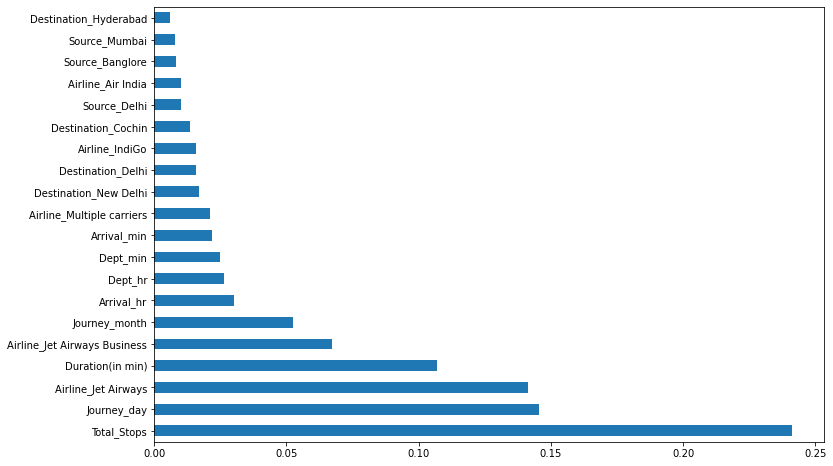

In [34]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

###**Fitting model using Random Forest**



In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [37]:
y_pred = reg_rf.predict(X_test)

In [38]:
reg_rf.score(X_train,y_train)

0.9530260645333561

In [39]:
reg_rf.score(X_test, y_test)

0.8238142942712547

C:\Users\Aby Mathews\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


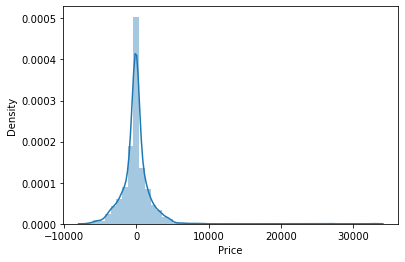

In [40]:
sns.distplot(y_test-y_pred)
plt.show()

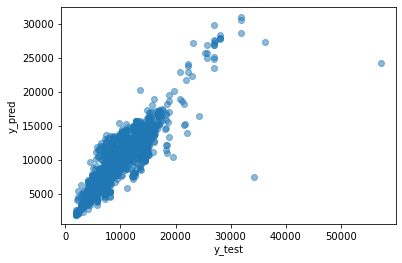

In [41]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [42]:
from sklearn import metrics

In [43]:
metrics.r2_score(y_test, y_pred)

0.8238142942712547

###**Hyperparameter Tuning**

we are using RandomizedSearchCV

In [44]:
from sklearn.model_selection import RandomizedSearchCV


In [45]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [46]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [47]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2,  random_state=42, n_jobs = 1)

In [48]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [49]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [50]:
prediction = rf_random.predict(X_test)

In [51]:
metrics.r2_score(y_test,prediction)

0.8363295908802886

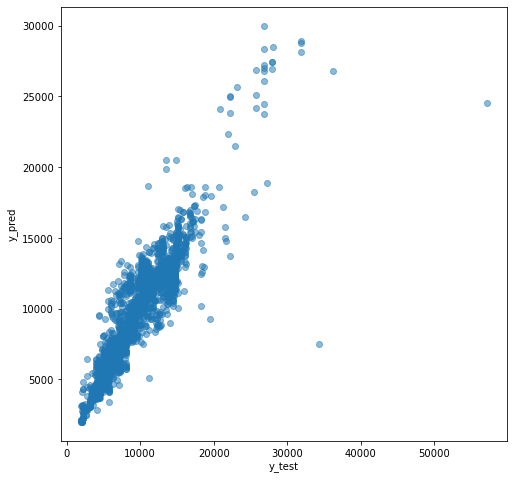

In [52]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### svm

In [53]:
from sklearn.svm import SVC

'svm1=SVC()\nsvm1.fit(X_train,y_train)\nsvm1_yhat=svm1.predict(X_test)'

In [54]:
#metrics.r2_score(y_test,svm1_yhat)

In [55]:
svm =SVC(C= 1, kernel= 'linear', random_state= 0) 
svm.fit(X_train,y_train) 
svm_yhat=svm.predict(X_test) 


In [56]:
metrics.r2_score(y_test,svm_yhat)

0.5830464280520907

In [57]:
y_test

6075     16655
3544      4959
9291      9187
5032      3858
2483     12898
         ...  
9797      7408
9871      4622
10063     7452
8802      8824
8617     14151
Name: Price, Length: 2137, dtype: int64

In [58]:
svm_yhat

array([16840,  4959,  8452, ...,  6152, 13339, 13994], dtype=int64)

### logreg

In [59]:
from sklearn.linear_model import LogisticRegression
#lr=LogisticRegression()
lr = LogisticRegression(solver='liblinear', penalty='l1')
lr.fit(X_train,y_train.ravel())
predictions = lr.predict(X_test)

In [60]:
metrics.r2_score(y_test,predictions)

0.6392506641998728

### xgboost

In [63]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=50,random_state=2)
xgb.fit(X_train,y_train) 
xgb1_yhat=xgb.predict(X_test)

C:\Users\Aby Mathews\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [64]:
metrics.r2_score(y_test,xgb1_yhat)

0.8444022734743407

In [ ]:
#!pip install XGBoost

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
X_train.info()

In [62]:
X_train=X_train.astype({"Total_Stops":int})

### multinomial naive bayes

In [65]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb1=mnb.predict(X_test)

In [66]:
metrics.r2_score(y_test,mnb1)

0.16861401873424142

### extra trees regressor

In [67]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)
reg1=reg.predict(X_test)

In [68]:
metrics.r2_score(y_test,reg1)

0.805852190334869

### gradient boosting regressor

In [69]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)
gbr.fit(X_train,y_train)
gbr1= gbr.predict(X_test)

In [70]:
metrics.r2_score(y_test,gbr1)

0.7644029072722779

In [71]:
y_test1=np.array(y_test)

In [72]:
y_test1

array([16655,  4959,  9187, ...,  7452,  8824, 14151], dtype=int64)

In [73]:
y_test1.reshape(1, -1)

array([[16655,  4959,  9187, ...,  7452,  8824, 14151]], dtype=int64)

### decision tree regressor

In [74]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 3)
dt.fit(X_train,y_train)
dt1 = dt.predict(X_test)


In [75]:
metrics.r2_score(y_test,dt1)

0.5337672151080122

### linear regression

In [76]:
from sklearn.linear_model import LinearRegression
lir = LinearRegression()
lir.fit(X_train,y_train)
lir1= lr.predict(X_test)

In [77]:
metrics.r2_score(y_test,lir1)

0.6392506641998728

### model selection

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [79]:
reg_rf = RandomForestRegressor()

#svm=SVC()
#svm =SVC(C= 1, kernel= 'linear', random_state= 0)

lr = LogisticRegression(solver='liblinear', penalty='l1')

xgb = XGBRegressor(n_estimators=50,random_state=2)

mnb = MultinomialNB()

reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)

gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)

dt = DecisionTreeRegressor(max_depth = 3)

lir = LinearRegression()

In [80]:
clfs = {
    'RF' : reg_rf,

    'LR' : lr,
    'xgb':xgb,
    'MNB': mnb, 
    'REG':reg,
    'gbr':gbr,
    'DT': dt, 
    'LIR': lir    
}

In [81]:
def train_regressor(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    score=metrics.r2_score(y_test,y_pred)
    
    return score


In [82]:
scores= []
for name,clf in clfs.items():
    
    
    current_score = train_regressor(clf, X_train,y_train,X_test ,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_score)
   
    
    scores.append(current_score)
 

For  RF
Accuracy -  0.8177646162874483
For  LR
Accuracy -  0.6388620575642308


C:\Users\Aby Mathews\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


For  xgb
Accuracy -  0.8444022734743407
For  MNB
Accuracy -  0.16861401873424142
For  REG
Accuracy -  0.805852190334869
For  gbr
Accuracy -  0.764402907272278
For  DT
Accuracy -  0.5337672151080122
For  LIR
Accuracy -  0.6196858941274606


In [88]:
import pickle
pickle.dump(clf,open('model.pkl','wb'))

In [85]:
final=pickle.load(open("model.pkl",'rb'))